In [1]:
import pandas as pd
from dbconn import querydb, querydbtopandas
import plotly.graph_objects as go

In [11]:
scores = pd.read_parquet("2019-10.gzip")
scores = scores.dropna()

In [12]:
prestadores = str(scores.prestador.tolist()).lstrip("[").rstrip("]")

In [13]:
prestadores = querydbtopandas(f"""select id_pre_prestador as prestador,  desc_pre_nombre, Q.deno  
                    from dba.d_pre_prestador a12
                    LEFT JOIN dba.prestad_costo_centros E
                    ON a12.id_pre_prestador = E.prestad and E.baja_fecha is null and e.prepaga = ( select min(PCC1.prepaga) from dba.prestad_costo_centros PCC1 where PCC1.prestad =  e.prestad )   
                    LEFT JOIN dba.costo_centros Q
                    ON E.centro = Q.centro
                    where id_pre_prestador in ({prestadores})""")

In [14]:
len(scores)

6734

In [15]:
len(prestadores)

6734

In [16]:
prestadores.prestador.unique().tolist()

[20321,
 20676,
 21446,
 89737,
 90146,
 22310,
 156607,
 24331,
 26128,
 26825,
 93287,
 225839,
 29959,
 233989,
 168660,
 169132,
 179887,
 115139,
 117481,
 57066,
 123535,
 190326,
 125861,
 196561,
 198245,
 67880,
 69038,
 206716,
 80680,
 146662,
 83916,
 463,
 85984,
 152541,
 20322,
 87664,
 20677,
 21447,
 24333,
 156107,
 25511,
 227870,
 30083,
 165223,
 166494,
 167433,
 168203,
 170919,
 174996,
 46114,
 112183,
 113553,
 178481,
 117484,
 120592,
 57470,
 67314,
 200203,
 201398,
 144948,
 80681,
 83533,
 151269,
 151594,
 2117,
 20323,
 88662,
 24345,
 25742,
 166495,
 167435,
 167674,
 170093,
 40510,
 177971,
 118676,
 52323,
 127080,
 63491,
 196119,
 133314,
 198753,
 199306,
 203045,
 212271,
 80682,
 2118,
 87263,
 20324,
 87668,
 88418,
 88839,
 24243,
 157243,
 227366,
 98413,
 231429,
 166020,
 36053,
 167676,
 169138,
 40512,
 238562,
 174517,
 173068,
 109245,
 176309,
 177756,
 177434,
 120882,
 119397,
 57473,
 80683,
 84096,
 216897,
 84507,
 218115,
 864

In [17]:
scores = prestadores.merge(scores).drop_duplicates()

In [18]:
scores_esp = scores.groupby("deno")["score"].mean().reset_index().rename(columns={"score": "score_esp"})

In [19]:
scores = scores.merge(scores_esp)

In [20]:
scores = scores.round(2)

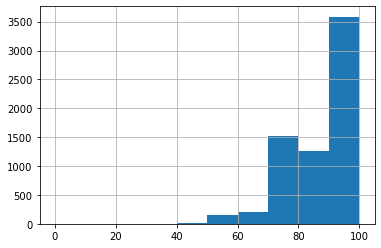

In [21]:
scores.score.hist()

In [76]:
scores[scores["deno"] == "Cirugía Plástica"]

,prestador,desc_pre_nombre,deno,score,mes,score_esp
1935,26825,"Nadal López,Emmanuela",Cirugía Plástica,58.13,2019-10,82.14
1936,46114,"Giustozzi,Walter R.",Cirugía Plástica,58.33,2019-10,82.14
1937,63491,"Serrano Alcala,Roberto",Cirugía Plástica,58.33,2019-10,82.14
1938,67549,"Cravino,Teresita",Cirugía Plástica,81.90,2019-10,82.14
1939,26145,"Gnecco,Jorge",Cirugía Plástica,76.35,2019-10,82.14
...,...,...,...,...,...,...
2015,238453,"Zalamez,Victor",Cirugía Plástica,100.00,2019-10,82.14
2016,101577,"Rodríguez,Juan C.",Cirugía Plástica,100.00,2019-10,82.14
2017,167411,"Mendoza Osuna,Pablo A.",Cirugía Plástica,84.63,2019-10,82.14
2018,198228,"Seren,Juan M.",Cirugía Plástica,66.01,2019-10,82.14


In [75]:
scores.deno.unique()

array(['Clínica Médica', 'Ginecología', 'Traumatología Pediátrica',
       'Ecografía / Radiología', 'Neumonología', 'Nefrología',
       'Cirugía de Cabeza y Cuello', 'Cirugía Plástica', 'Endocrinología',
       'Traumatología', 'Medicina General', 'Oftalmología', 'Urología',
       'Alergia e Inmunología', 'Neurologia',
       'Centros de Atención Ambulatoria', 'Dermatología Pediátrica',
       'Guardias Reemplazos', 'Pediatría', 'Neurología Pediátrica',
       'Hematología', 'Psicopatología', 'Traumatología Centenario',
       'Endocrinología Pediátrica', 'Dermatología', 'O.R.L.',
       'Gastroenterología', 'Kinesiología', 'Reumatología',
       'Guardias Reemplazos CyMSA', 'Hemoterapia', 'Cardiología',
       'Centros de Diagnóstico', 'Fonoaudiología', 'Cirugía General',
       'Clinicas y Sanatorios', 'Gastroenterología Pediátrica', 'Opticas',
       'Domicilios - Urgencias', 'Neumonología Pediátrica',
       'Nefrología Pediátrica', 'Clínicas de Int. Psiquiátrica',
       'Próte

In [103]:
prestador = 20322

In [104]:
score_esp = scores[scores["prestador"] == prestador].score_esp.values[0]

nombre = scores[scores["prestador"] == prestador].desc_pre_nombre.values[0]

esp = scores[scores["prestador"] == prestador].deno.values[0]

score_prestador = scores[scores["prestador"] == prestador].score.values[0]

mes = scores.mes.unique()[0]

In [105]:
colors = ['rgb(254, 245, 244)','rgb(247,252,245)', 'rgb(229,245,224)', 'rgb(199,233,192)', 'rgb(161,217,155)', 'rgb(116,196,118)', 'rgb(65,171,93)', 'rgb(35,139,69)','rgb(0,109,44)','rgb(0,68,27)']
fig_scores = go.Figure(go.Indicator(
    delta = {'reference': score_esp , 'position': "right"},
    mode = "number+gauge+delta", value = score_prestador,
    domain = {'x': [0, 1], 'y': [0, 1]},
    
    title = {'text':f"<b>Score</b><br><span style='color: gray; font-size:0.8em'>{mes}</span>", 'font': {"size": 14}},
    gauge = {
        'shape': "bullet",
            'axis': {'range': [None, 100], "tickvals":[score_prestador,score_esp], "tickangle":-90, "ticktext": ['Score Prestador', "Score Especialidad"],},
        'threshold': {
            'line': {'color': "skyblue", 'width': 5},
            'thickness': 0.75, 'value': score_esp},
        'bgcolor': "white",
        'steps':[{'range': [i, j], 'color': k} for i,j,k in zip(list(range(0,100,10)),list(range(10,110,10)), colors )],
        'bar': {'color': "#b9b9b9"}
    
    }))
fig_scores.update_layout(height = 350, width= 1000, title=dict(text = f"<b>Prestador : #nombre,  Especialidad: {esp}</b><br><span style='color: gray; font-size:0.8em'>En celeste se indica el score medio de su especialidad</span>"),
                         margin=dict(b=160),
 )
fig_scores.show()